# Bitcoin Price Prediction Using Twitter Sentimental Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser

## Bitcoin Price Analysis

In [47]:
btc_data = pd.read_csv("crytpo_data.csv", index_col = 0)
btc_data.head(5)

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time
_id,,,,,,,,,,
67477c998ad02b4e72f11b46,BTC,Bitcoin USD,96921.72,96962.00,91804.37,8.124583e+10,91938.32,91938.32,1732738201,2024-11-27 20:10:01.889000
67476e8a722b15343d0157f4,BTC,Bitcoin USD,96078.15,96664.20,91804.37,8.124583e+10,91938.32,91938.32,1732734600,2024-11-27 19:10:02.207000
6747607add19519ca50317d8,BTC,Bitcoin USD,96328.41,96530.48,91804.37,8.124583e+10,91938.32,91938.32,1732731000,2024-11-27 18:10:02.034000
6747526a3ef7e2188ee70bfe,BTC,Bitcoin USD,95514.40,96439.68,91804.37,8.124583e+10,91938.32,91938.32,1732727400,2024-11-27 17:10:02.088000
6747445a23efdfd7ce8dacb7,BTC,Bitcoin USD,95778.60,95960.00,91804.37,8.124583e+10,91938.32,91938.32,1732723800,2024-11-27 16:10:02.056000


In [48]:
btc_data.describe()

,price,dayHigh,dayLow,volume,open,close,timestamp
count,729.000000,729.000000,729.000000,7.290000e+02,729.000000,729.000000,7.290000e+02
mean,83536.379849,84597.927016,81695.471811,7.108863e+10,82767.179084,82767.179084,1.731428e+09
std,10787.795406,10954.365599,10609.820189,3.269491e+10,10831.622600,10831.622600,7.579677e+05
min,67403.940000,68538.000000,66783.770000,1.819931e+10,67785.195000,67785.195000,1.730132e+09
25%,72306.000000,72714.380000,69705.760000,4.551983e+10,70202.875000,70202.875000,1.730773e+09
50%,87671.530000,89600.000000,85010.000000,6.365704e+10,87305.710000,87305.710000,1.731428e+09
75%,92476.100000,93772.260000,90853.000000,8.930853e+10,91938.320000,91938.320000,1.732083e+09
max,99639.100000,99860.000000,97806.000000,1.698264e+11,99005.305000,99005.305000,1.732738e+09


In [49]:
btc_data = btc_data.dropna()

btc_data['time'] = pd.to_datetime(btc_data['time'], format='mixed')
btc_data = btc_data.sort_values(by='time')

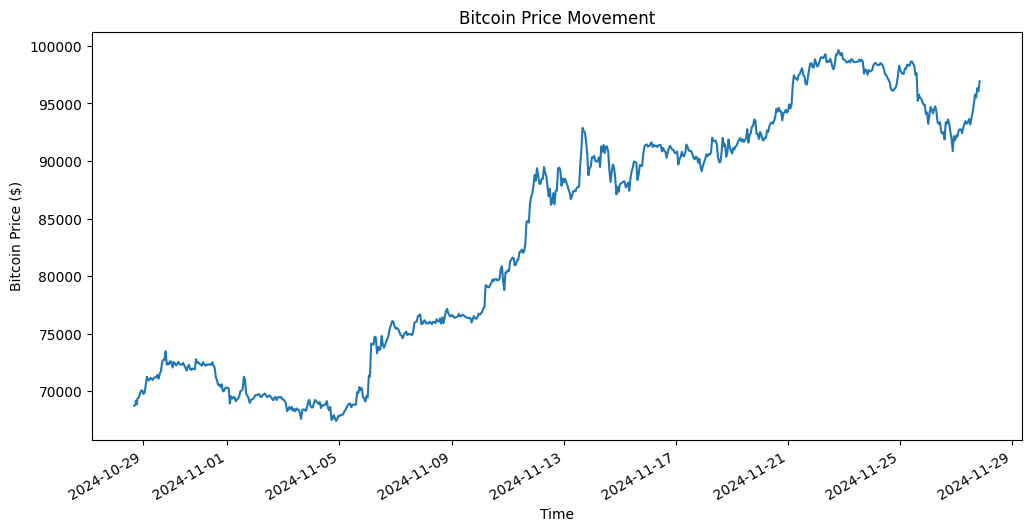

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data["time"], btc_data["price"])
plt.xlabel('Time')
plt.ylabel('Bitcoin Price ($)')
plt.title('Bitcoin Price Movement')

plt.gcf().autofmt_xdate()
plt.show()

## II Twitter Sentimental Analysis

In [ ]:
tw_data = pd.read_csv('twitter_data.csv',index_col=0)
tw_data.head(5)

### Flair Sentiment Analysis
- Test out Flair using selected twitter sample.
- Reference: [Flair](https://github.com/flairNLP/flair)

In [ ]:
from flair.data import Sentence
from flair.nn import Classifier

sample = tw_data.iloc[0]["text"]
print("Sample: ", sample)
sentence = Sentence(sample)

tagger = Classifier.load('sentiment')
tagger.predict(sentence)

print("Sentiment Value: ", sentence.labels[0].value)
print("Sentiment Confidence: ", sentence.labels[0].score)

## VADER Sentiment Analysis
- Test out VADER using selected Twitter sample.
- Reference: [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sample = tw_data.iloc[0]["text"]
print("Sample: ", sample)

analyzer = SentimentIntensityAnalyzer()

vs = analyzer.polarity_scores(sample)
print("{:-<65} {}".format(sample, str(vs)))

### Data Preprocessing
- Extract link values from the **text** column with regex.
- Remove all "\n" from the **text** column.
- Assert if there is any missing value for the **text** column.
- Assert if there is any empty string for the **text** column.

In [ ]:
import re
import util.text as t

In [ ]:
# Assert if there is any missing values for the **text** column
assert tw_data.isnull().sum()['text'] == 0

In [ ]:
# If there is missing values, drop these missing values
tw_data = tw_data.dropna()

In [ ]:
# Extract link values from the **text** column with regex.
tw_data['text'] = tw_data['text'].apply(
  lambda x: re.sub(r'https?://\S+', '', x).strip()
  )  
# Remove all "\n" from the **text** column.
tw_data['text'] = tw_data['text'].replace('\n', '', regex=True)

tw_data.iloc[1]['text']

In [ ]:
# Assert if there is any empty strings for the **text** column
assert len(tw_data.index[tw_data['text'] == ''].tolist()) == 0

In [ ]:
# Check empty string for the **text** colum
print("Number of empty strings: ", len(tw_data.index[tw_data['text'] == ''].tolist()))
tw_data.index[tw_data['text'] == ''].tolist()[:5]

In [ ]:
# Apply Flair sentiment anaylysis to the twitter dataset.
tw_data[['fl_sentiment', 'fl_confidence']] = tw_data['text'].apply(
  lambda x: pd.Series(t.flair_sentiment(x))
  )

tw_data['fl_sentiment'].head(1)
tw_data['fl_confidence'].head(1)

In [ ]:
# Apply VADER sentiment anaylysis to the twitter dataset.
tw_data[['vd_negative', 'vd_neutral', 'vd_positive', 'vd_compound']] = tw_data['text'].apply(
  lambda x: pd.Series(t.vader_sentiment(x))
  )

tw_data.head(1)

In [ ]:
# Convert current cleaned data to csv
tw_data.to_csv('updated_twitter_data.csv', index=False)

## Visualize Preprocessed Data

In [6]:
tw_data = pd.read_csv('updated_twitter_data.csv')
tw_data.describe()

,tweet_id,bookmarks,favorites,quotes,replies,retweets,fl_confidence,vd_negative,vd_neutral,vd_positive,vd_compound
count,1.207800e+04,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000
mean,1.855260e+18,320.077745,6307.339129,67.245984,594.567395,1260.782083,0.948589,0.026164,0.880151,0.093680,0.192342
std,5.680791e+15,885.494704,11757.474182,223.043356,1895.199431,2832.791556,0.100787,0.077826,0.141223,0.127636,0.386998
min,1.722846e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.504757,0.000000,0.218000,0.000000,-0.945100
25%,1.852763e+18,19.000000,825.000000,5.000000,49.000000,136.000000,0.956594,0.000000,0.775000,0.000000,0.000000
50%,1.855918e+18,80.000000,2701.000000,18.000000,169.000000,426.000000,0.997250,0.000000,0.917000,0.000000,0.000000
75%,1.858449e+18,241.000000,7029.500000,49.000000,469.000000,1193.750000,0.999667,0.000000,1.000000,0.187000,0.492600
max,1.861854e+18,17293.000000,208292.000000,3902.000000,50094.000000,43987.000000,0.999997,0.705000,1.000000,0.782000,0.995400


### Visualize Flair Sentiment Movements

In [7]:
# Preprocess fl_confidence value by fl_sentiment column.
tw_data['fl_confidence'] = np.where(tw_data['fl_sentiment'] == 'NEGATIVE', 
                                 -tw_data['fl_confidence'], 
                                 tw_data['fl_confidence'])
tw_data.head(3)

,symbol,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time,fl_sentiment,fl_confidence,vd_negative,vd_neutral,vd_positive,vd_compound
0,BTC,bitcoin,1849905253916786767,hamptonism,1144.0,9408.0,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78.0,113.0,803.0,2024-10-28 19:08:02.786000,POSITIVE,0.837527,0.0,0.769,0.231,0.5106
1,BTC,bitcoin,1850228656704049285,Ashcryptoreal,88.0,9210.0,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end of Octobe...",en,21.0,952.0,1278.0,2024-10-28 19:08:02.786000,NEGATIVE,-0.999922,0.0,0.889,0.111,0.3612
2,BTC,bitcoin,1849812562323325395,Vivek4real_,23.0,4219.0,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14.0,163.0,339.0,2024-10-28 19:08:02.786000,NEGATIVE,-0.999045,0.0,0.839,0.161,0.3612


### 1. Visualize Mean and Median Values
- Calculate the mean and median of **confidence** column grouped by each hour.
- Calculate the mean and median of **confidence** column grouped by day.

In [8]:
tw_data['time'] = pd.to_datetime(tw_data['time'])

In [9]:
tw_data = tw_data.sort_values(by='time')

# Hourly mean
f_hr_mean = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].mean().reset_index()

f_hr_mean.head()

,time,fl_confidence
0,2024-10-28 19:00:00,-0.659364
1,2024-10-28 20:00:00,-0.856142
2,2024-10-28 21:00:00,-0.547036
3,2024-10-28 22:00:00,-0.756660
4,2024-10-28 23:00:00,-0.620880


In [10]:
# Hourly median
f_hr_med = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].median().reset_index()

f_hr_med.head()

,time,fl_confidence
0,2024-10-28 19:00:00,-0.962878
1,2024-10-28 20:00:00,-0.992461
2,2024-10-28 21:00:00,-0.991899
3,2024-10-28 22:00:00,-0.999045
4,2024-10-28 23:00:00,-0.966333


In [11]:
# Hourly standard deviation
f_hr_std = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].std().reset_index()

f_hr_std.head()

,time,fl_confidence
0,2024-10-28 19:00:00,0.691188
1,2024-10-28 20:00:00,0.479230
2,2024-10-28 21:00:00,0.801825
3,2024-10-28 22:00:00,0.631571
4,2024-10-28 23:00:00,0.749525


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/184208073.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


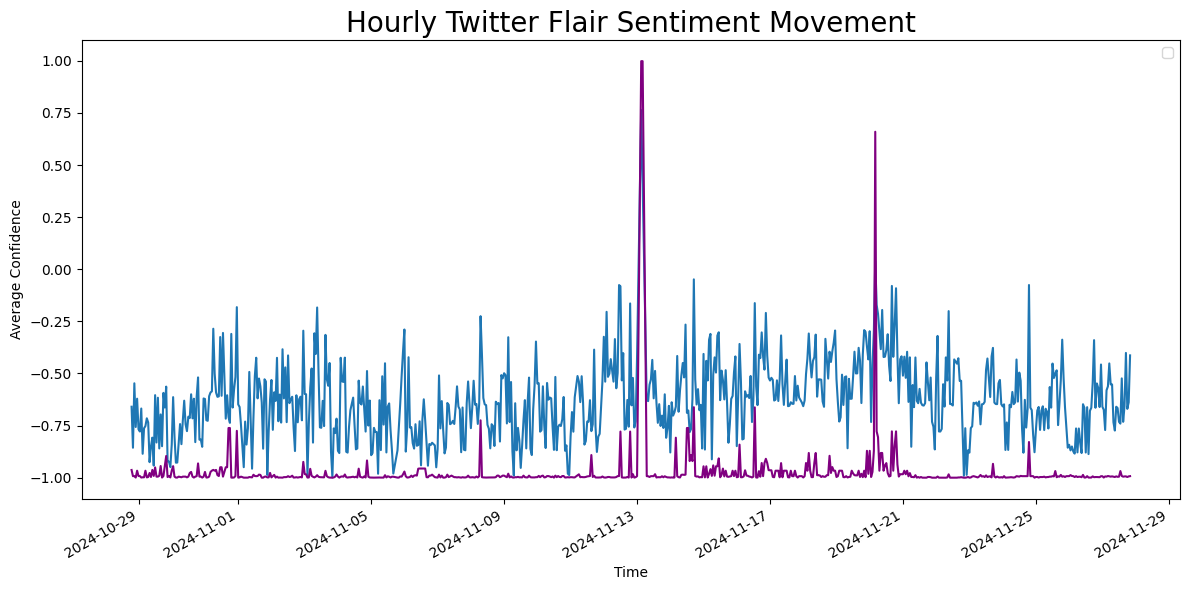

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(f_hr_mean['time'], f_hr_mean['fl_confidence'])
plt.plot(f_hr_med['time'], f_hr_med['fl_confidence'], color='purple')

plt.title('Hourly Twitter Flair Sentiment Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()


In [13]:
# Daily mean
f_day_mean = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )['fl_confidence'].mean().reset_index()

f_day_mean.head()

,time,fl_confidence
0,2024-10-28,-0.683241
1,2024-10-29,-0.777407
2,2024-10-30,-0.742708
3,2024-10-31,-0.552631
4,2024-11-01,-0.686260


In [14]:
# Daily median
f_day_med = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )['fl_confidence'].median().reset_index()

f_day_med.head()

,time,fl_confidence
0,2024-10-28,-0.992180
1,2024-10-29,-0.994748
2,2024-10-30,-0.994748
3,2024-10-31,-0.965998
4,2024-11-01,-0.998059


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/3937480033.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


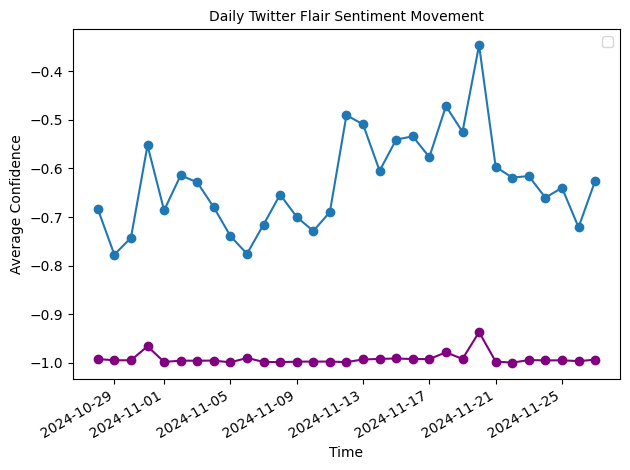

In [15]:
plt.figure()

plt.plot(f_day_mean['time'], f_day_mean['fl_confidence'], marker='o')
plt.plot(f_day_med['time'], f_day_med['fl_confidence'], color='purple', marker='o')

plt.title('Daily Twitter Flair Sentiment Movement', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

### 2. Visualize Sentiment Values
- For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
- Drop any empty data from **sentiment** column.

In [16]:
# For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
hr_pos_neg = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_sentiment'].value_counts().unstack().reset_index()

hr_pos_neg.head()

fl_sentiment,time,NEGATIVE,POSITIVE
0,2024-10-28 19:00:00,28.0,6.0
1,2024-10-28 20:00:00,16.0,1.0
2,2024-10-28 21:00:00,13.0,4.0
3,2024-10-28 22:00:00,15.0,2.0
4,2024-10-28 23:00:00,14.0,3.0


In [17]:
# Check if there is any empty data
hr_pos_neg.isnull().sum()

fl_sentiment
time         0
NEGATIVE     0
POSITIVE    24
dtype: int64

In [18]:
# Drop any empty data
hr_pos_neg = hr_pos_neg.dropna()[1:]

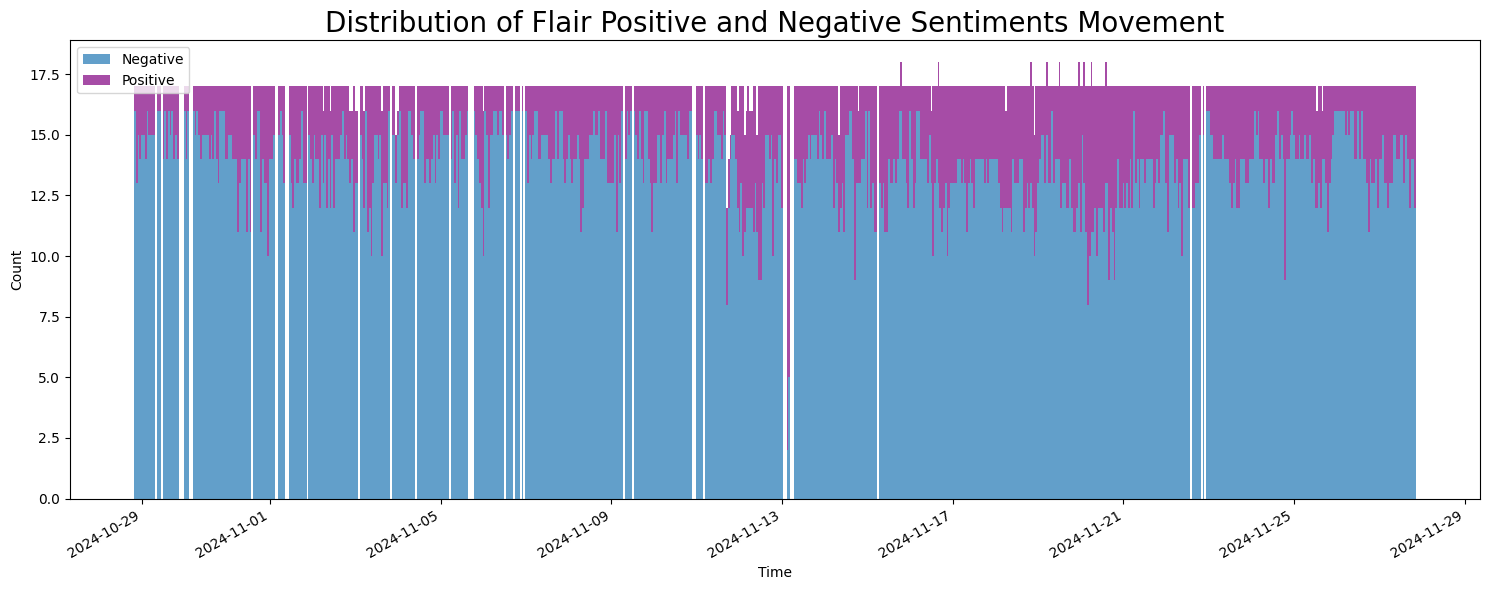

In [19]:
plt.figure(figsize=(15, 6))

plt.bar(hr_pos_neg['time'], hr_pos_neg['NEGATIVE'], width=1/24,
        alpha=0.7, label='Negative')

plt.bar(hr_pos_neg['time'], hr_pos_neg['POSITIVE'], width=1/24,
        bottom=hr_pos_neg['NEGATIVE'], color='purple', alpha=0.7, label='Positive')

plt.title('Distribution of Flair Positive and Negative Sentiments Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Visualize VADER Sentiment Movement
- Calculate the mean and median of **confidence** column grouped by each hour.
- Calculate the mean and median of **confidence** column grouped by day.

In [20]:
# Hourly mean
v_hr_mean = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].mean().reset_index()

v_hr_mean.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28 19:00:00,0.067324,0.039471,0.893147,0.090591
1,2024-10-28 20:00:00,0.055529,0.025824,0.918588,0.071700
2,2024-10-28 21:00:00,0.115412,0.000000,0.884588,0.287594
3,2024-10-28 22:00:00,0.070941,0.093176,0.835882,0.001594
4,2024-10-28 23:00:00,0.130353,0.000000,0.869647,0.282982


In [21]:
# Hourly median
v_hr_med = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].median().reset_index()

v_hr_med.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28 19:00:00,0.000,0.0,0.903,0.0000
1,2024-10-28 20:00:00,0.000,0.0,1.000,0.0000
2,2024-10-28 21:00:00,0.123,0.0,0.877,0.3182
3,2024-10-28 22:00:00,0.000,0.0,0.839,0.0000
4,2024-10-28 23:00:00,0.123,0.0,0.877,0.3182


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/371765151.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


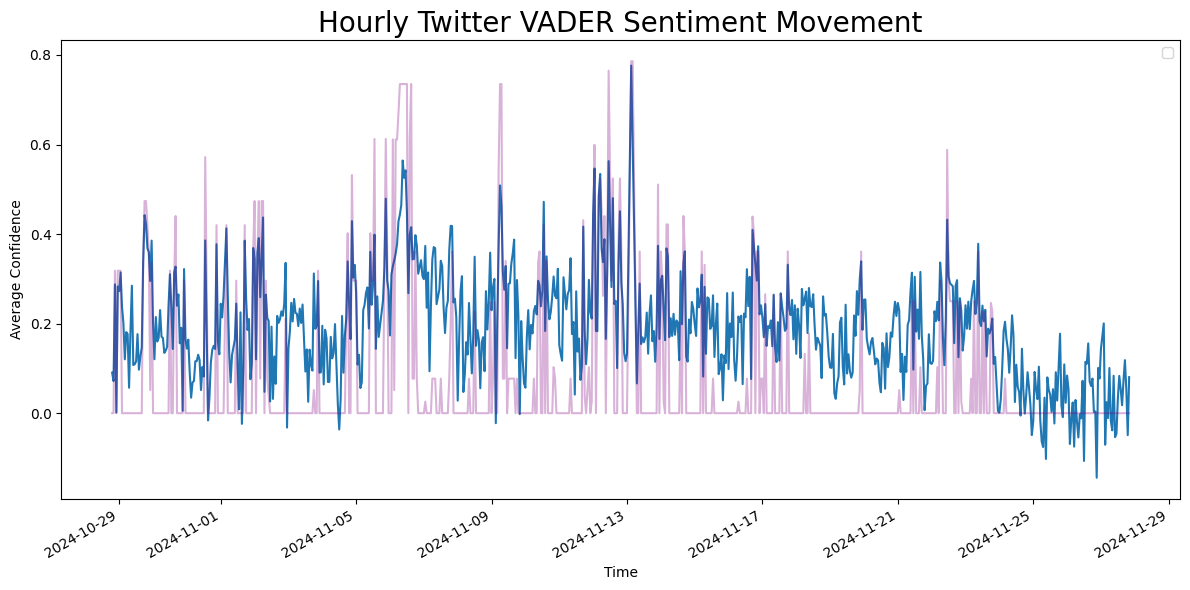

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(v_hr_mean['time'], v_hr_mean['vd_compound'])
plt.plot(v_hr_med['time'], v_hr_med['vd_compound'], color='purple', alpha=0.3)

plt.title('Hourly Twitter VADER Sentiment Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
# Daily mean
v_day_mean = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].mean().reset_index()

v_day_mean.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28,0.084480,0.032990,0.882500,0.137509
1,2024-10-29,0.087436,0.020728,0.891824,0.229950
2,2024-10-30,0.078708,0.015728,0.905576,0.199071
3,2024-10-31,0.066368,0.030445,0.903187,0.126812
4,2024-11-01,0.080500,0.029864,0.889636,0.188688


In [24]:
# Daily median
v_day_med = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].median().reset_index()

v_day_med.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28,0.0,0.0,0.889,0.0
1,2024-10-29,0.0,0.0,0.889,0.0
2,2024-10-30,0.0,0.0,1.000,0.0
3,2024-10-31,0.0,0.0,1.000,0.0
4,2024-11-01,0.0,0.0,1.000,0.0


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/1387633730.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


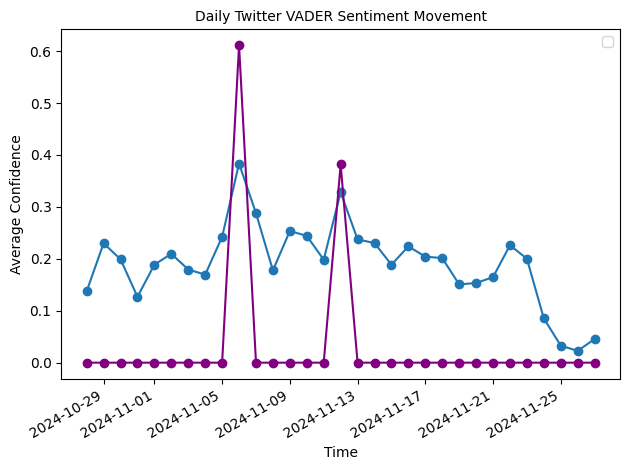

In [25]:
plt.figure()

plt.plot(v_day_mean['time'], v_day_mean['vd_compound'], marker='o')
plt.plot(v_day_med['time'], v_day_med['vd_compound'], color='purple',  marker='o')

plt.title('Daily Twitter VADER Sentiment Movement', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

### Visualize both Sentiment Movements

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/862961805.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


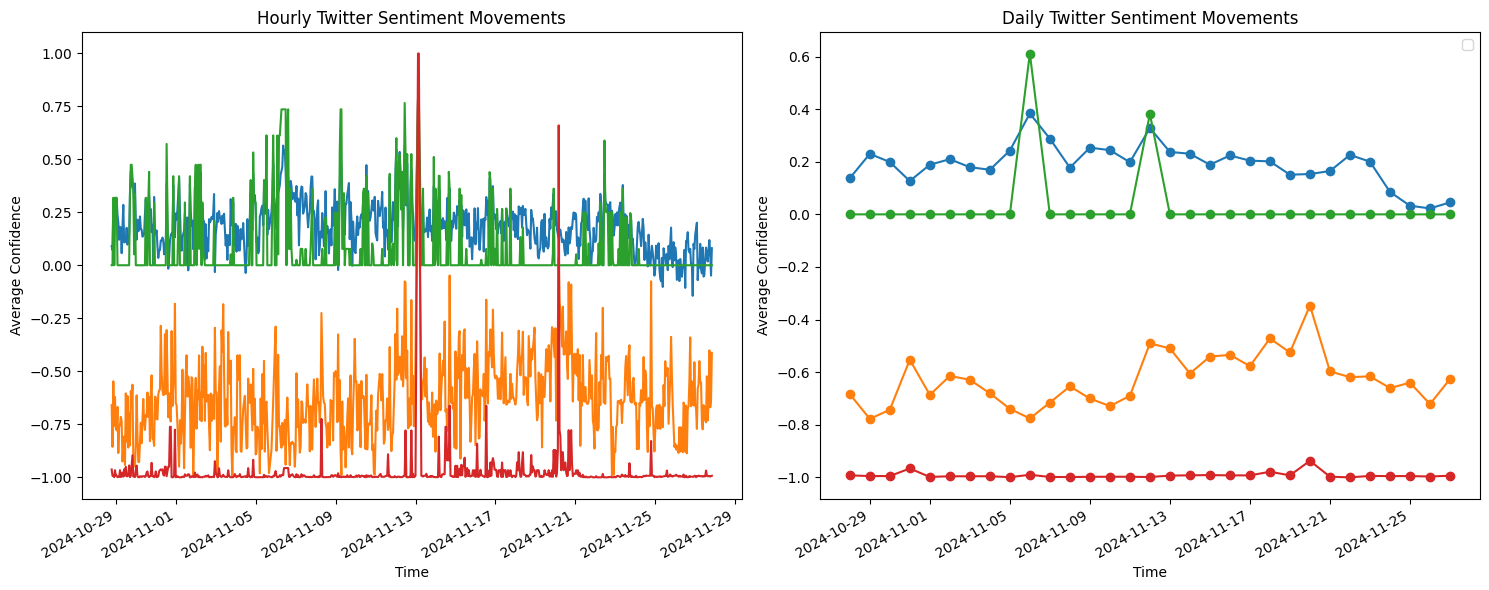

In [26]:
# Twitter sentiment movements through time
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(v_hr_mean['time'], v_hr_mean['vd_compound'])
ax[0].plot(f_hr_mean['time'], f_hr_mean['fl_confidence'])
ax[0].plot(v_hr_med['time'], v_hr_med['vd_compound'])
ax[0].plot(f_hr_med['time'], f_hr_med['fl_confidence'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Average Confidence")
ax[0].set_title("Hourly Twitter Sentiment Movements")

ax[1].plot(v_day_mean['time'], v_day_mean['vd_compound'], marker='o')
ax[1].plot(f_day_mean['time'], f_day_mean['fl_confidence'], marker='o')
ax[1].plot(v_day_med['time'], v_day_med['vd_compound'], marker='o')
ax[1].plot(f_day_med['time'], f_day_med['fl_confidence'], marker='o')
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Average Confidence")
ax[1].set_title("Daily Twitter Sentiment Movements")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

## Find Correlation between Bitcoin Price Movemnent VS. Twitter Sentiment

In [51]:
# Clean hourly BTC price data
hr_btc = btc_data
hr_btc['time'] =  btc_data['time'].dt.floor('h')
  
hr_btc.head(5)

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time
_id,,,,,,,,,,
671fb860ac52f5b0f7c30c9d,BTC,Bitcoin USD,68720.00,69299.0,67532.48,2.338602e+10,67939.54,67939.54,1730132063,2024-10-28 16:00:00
671fc9e0862dc54995d32684,BTC,Bitcoin USD,68862.88,69299.0,67532.48,2.338602e+10,67939.54,67939.54,1730136542,2024-10-28 17:00:00
671fcae9e7a827dbfe8545d0,BTC,Bitcoin USD,69086.55,69299.0,67532.48,2.338602e+10,67939.54,67939.54,1730136809,2024-10-28 17:00:00
671fcd3dd4d6d91aa881bea7,BTC,Bitcoin USD,69172.61,69299.0,67532.48,2.338602e+10,67939.54,67939.54,1730137403,2024-10-28 17:00:00
671fcd9c4aac518e24176ab0,BTC,Bitcoin USD,69151.61,69299.0,67532.48,2.338602e+10,67939.54,67939.54,1730137499,2024-10-28 17:00:00


In [52]:
# Clean daily BTC price data using daily mean
day_btc = btc_data.groupby(
  btc_data['time'].dt.floor('d')
  )[['price']].mean().reset_index()

day_btc.head(5)

,time,price
0,2024-10-28,69289.377500
1,2024-10-29,71537.300417
2,2024-10-30,72240.830417
3,2024-10-31,71540.485417
4,2024-11-01,69668.325833


### Create Datasets on BTC Data and Sentiment Data

In [53]:
# Merge hourly btc_data with tw_data using sentiment mean values
df = pd.merge(hr_btc, v_hr_mean, on='time')
hr_btc_tw = pd.merge(df, f_hr_mean, on='time')

hr_btc_tw.head(5)

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence
0,BTC,Bitcoin USD,69376.60,69529.0,67532.48,2.338602e+10,67939.54,67939.54,1730142599,2024-10-28 19:00:00,0.067324,0.039471,0.893147,0.090591,-0.659364
1,BTC,Bitcoin USD,69438.00,70000.0,67532.48,2.338602e+10,67939.54,67939.54,1730146199,2024-10-28 20:00:00,0.055529,0.025824,0.918588,0.071700,-0.856142
2,BTC,Bitcoin USD,69741.99,70000.0,67532.48,2.338602e+10,67939.54,67939.54,1730149800,2024-10-28 21:00:00,0.115412,0.000000,0.884588,0.287594,-0.547036
3,BTC,Bitcoin USD,70056.00,70282.0,67532.48,2.338602e+10,67939.54,67939.54,1730153401,2024-10-28 22:00:00,0.070941,0.093176,0.835882,0.001594,-0.756660
4,BTC,Bitcoin USD,70051.00,70288.0,67532.48,3.665087e+10,67939.54,67939.54,1730157000,2024-10-28 23:00:00,0.130353,0.000000,0.869647,0.282982,-0.620880


In [54]:
# Merge daily btc_data with tw_data using sentiment mean values
df = pd.merge(day_btc, v_day_mean, on='time')
day_btc_tw = pd.merge(df, f_day_mean, on='time')

day_btc_tw.head(5)

,time,price,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence
0,2024-10-28,69289.377500,0.084480,0.032990,0.882500,0.137509,-0.683241
1,2024-10-29,71537.300417,0.087436,0.020728,0.891824,0.229950,-0.777407
2,2024-10-30,72240.830417,0.078708,0.015728,0.905576,0.199071,-0.742708
3,2024-10-31,71540.485417,0.066368,0.030445,0.903187,0.126812,-0.552631
4,2024-11-01,69668.325833,0.080500,0.029864,0.889636,0.188688,-0.686260


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/7095089.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


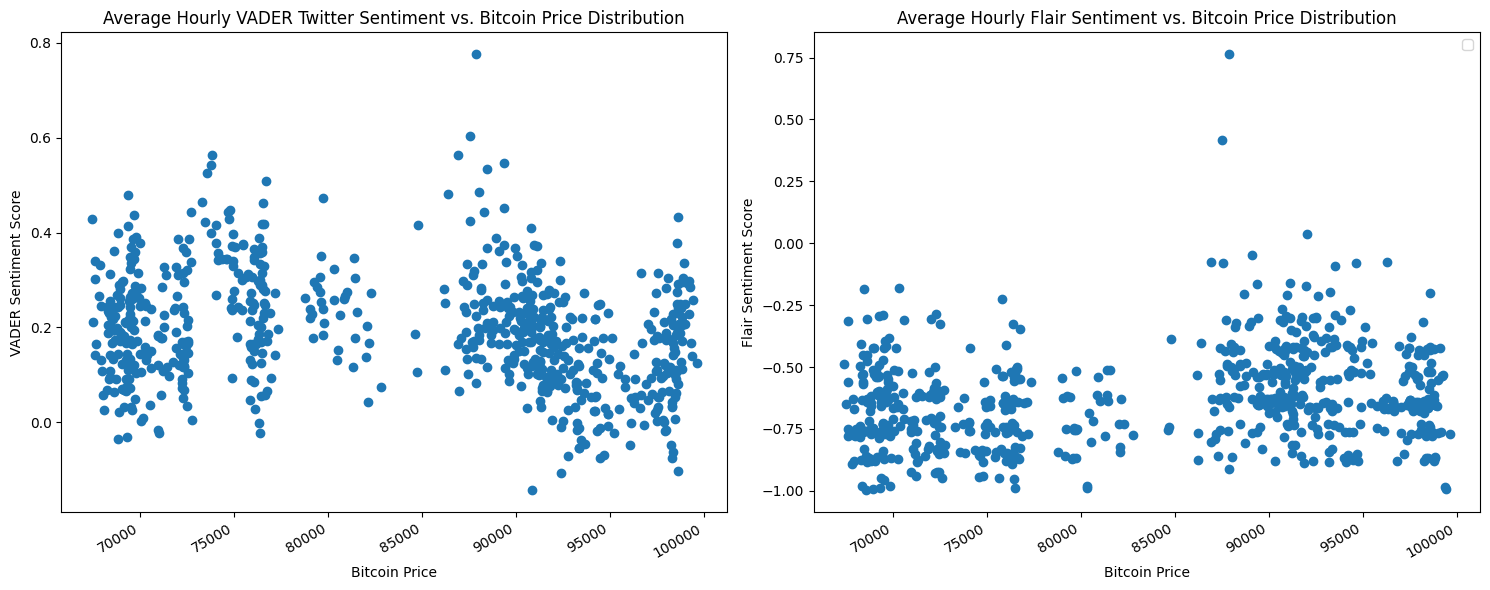

In [55]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(hr_btc_tw['price'], hr_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Average Hourly VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(hr_btc_tw['price'], hr_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Average Hourly Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

## Bitcoin Price Delta VS. Mean Sentiment Delta
### Hourly Mean & Median Data

In [ ]:
hr_btc_tw['price_delta'] = hr_btc_tw['price'].diff()
hr_btc_tw['fl_confidence_delta'] = hr_btc_tw['fl_confidence'].diff()
hr_btc_tw['vd_compound_delta'] = hr_btc_tw['vd_compound'].diff()

In [57]:
hr_btc_tw = hr_btc_tw.dropna()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/396795933.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


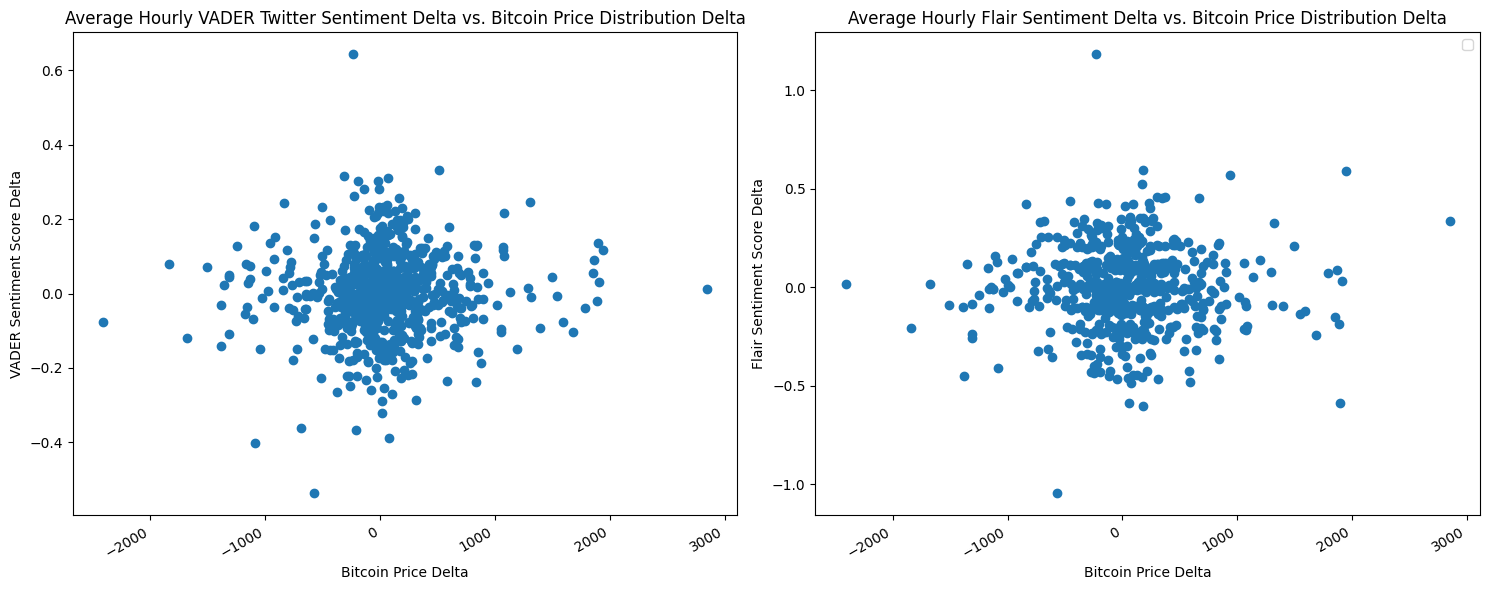

In [58]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(hr_btc_tw['price_delta'], hr_btc_tw['vd_compound_delta'])
ax[0].set_xlabel("Bitcoin Price Delta")
ax[0].set_ylabel("VADER Sentiment Score Delta")
ax[0].set_title("Average Hourly VADER Twitter Sentiment Delta vs. Bitcoin Price Distribution Delta")

ax[1].scatter(hr_btc_tw['price_delta'], hr_btc_tw['fl_confidence_delta'] )
ax[1].set_xlabel("Bitcoin Price Delta")
ax[1].set_ylabel("Flair Sentiment Score Delta")
ax[1].set_title("Average Hourly Flair Sentiment Delta vs. Bitcoin Price Distribution Delta")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/2961213183.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


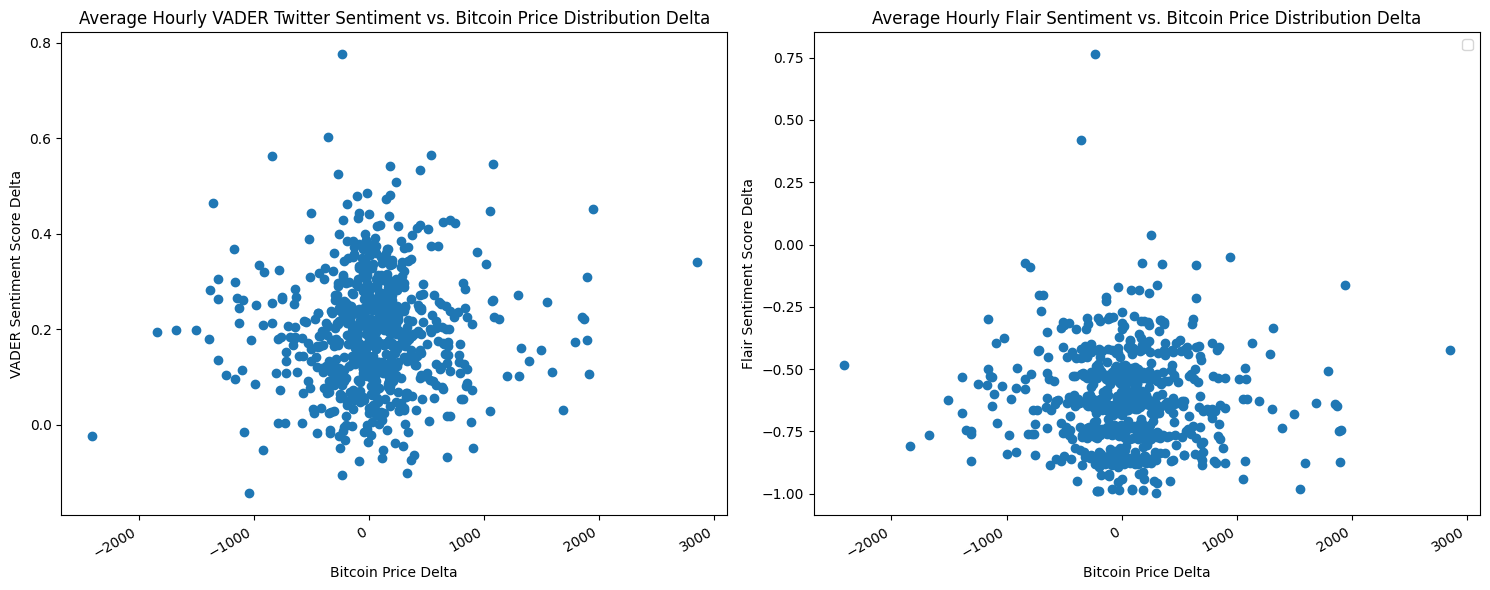

In [59]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(hr_btc_tw['price_delta'], hr_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price Delta")
ax[0].set_ylabel("VADER Sentiment Score Delta")
ax[0].set_title("Average Hourly VADER Twitter Sentiment vs. Bitcoin Price Distribution Delta")

ax[1].scatter(hr_btc_tw['price_delta'], hr_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price Delta")
ax[1].set_ylabel("Flair Sentiment Score Delta")
ax[1].set_title("Average Hourly Flair Sentiment vs. Bitcoin Price Distribution Delta")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [60]:
# Merge btc_data with tw_data using sentiment median values
df = pd.merge(hr_btc, v_hr_med, on='time')
hr_btc_tw = pd.merge(df, f_hr_med, on='time')

hr_btc_tw.head(5)

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence
0,BTC,Bitcoin USD,69376.60,69529.0,67532.48,2.338602e+10,67939.54,67939.54,1730142599,2024-10-28 19:00:00,0.000,0.0,0.903,0.0000,-0.962878
1,BTC,Bitcoin USD,69438.00,70000.0,67532.48,2.338602e+10,67939.54,67939.54,1730146199,2024-10-28 20:00:00,0.000,0.0,1.000,0.0000,-0.992461
2,BTC,Bitcoin USD,69741.99,70000.0,67532.48,2.338602e+10,67939.54,67939.54,1730149800,2024-10-28 21:00:00,0.123,0.0,0.877,0.3182,-0.991899
3,BTC,Bitcoin USD,70056.00,70282.0,67532.48,2.338602e+10,67939.54,67939.54,1730153401,2024-10-28 22:00:00,0.000,0.0,0.839,0.0000,-0.999045
4,BTC,Bitcoin USD,70051.00,70288.0,67532.48,3.665087e+10,67939.54,67939.54,1730157000,2024-10-28 23:00:00,0.123,0.0,0.877,0.3182,-0.966333


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/1985139908.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


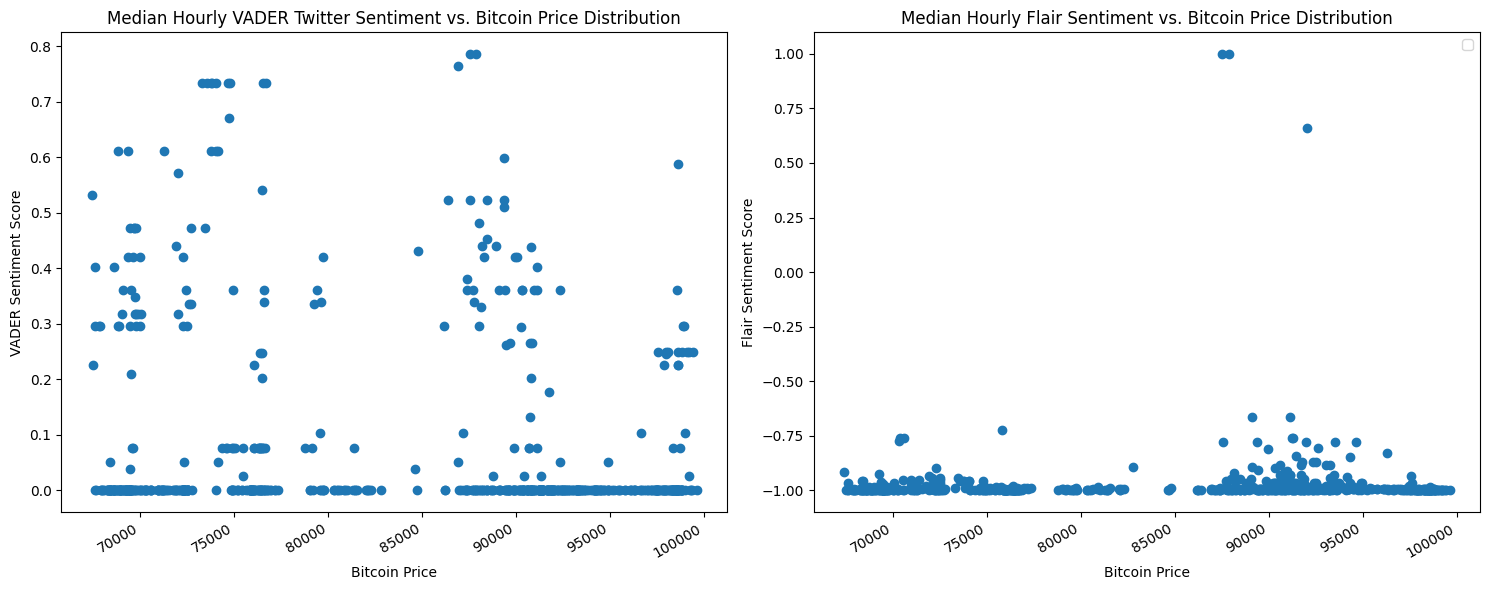

In [61]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(hr_btc_tw['price'], hr_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Median Hourly VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(hr_btc_tw['price'], hr_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Median Hourly Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [62]:
hr_btc_tw['price_delta'] = hr_btc_tw['price'].diff()
hr_btc_tw['volume_delta'] = hr_btc_tw['volume'].diff()
hr_btc_tw['fl_confidence_delta'] = hr_btc_tw['fl_confidence'].diff()
hr_btc_tw['vd_compound_delta'] = hr_btc_tw['vd_compound'].diff()

In [63]:
hr_btc_tw = hr_btc_tw.dropna()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/532525889.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


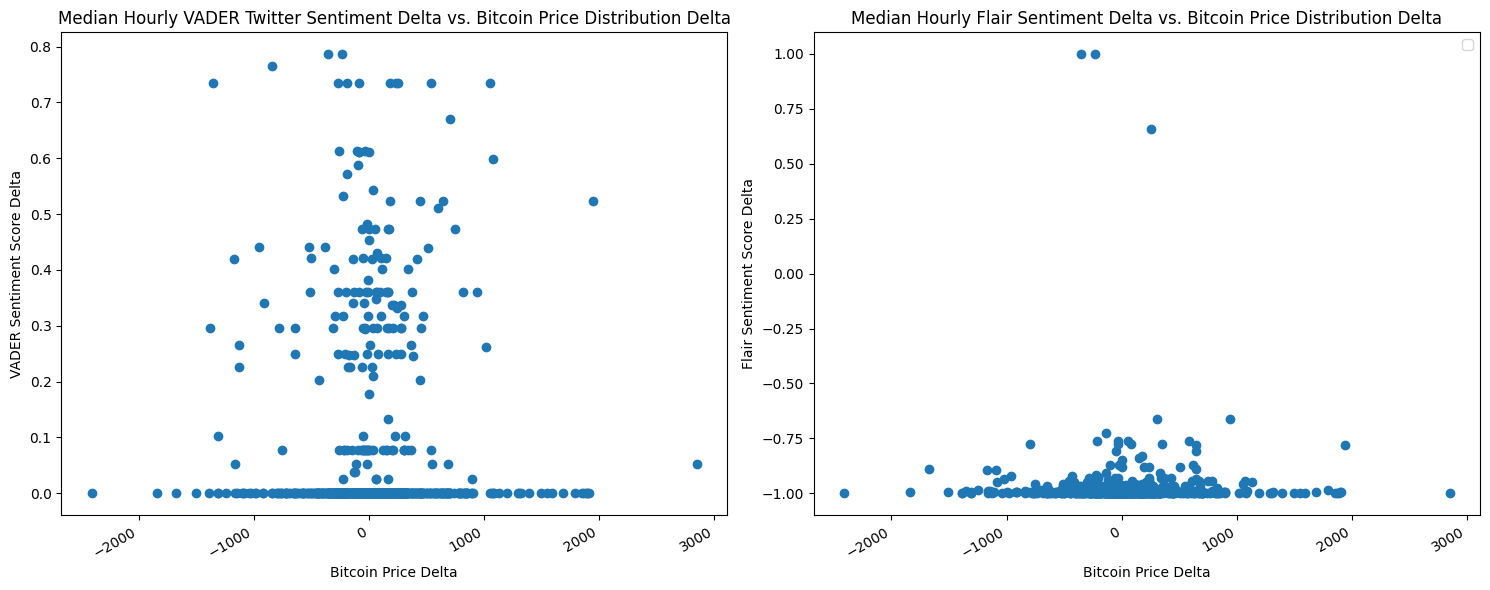

In [64]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(hr_btc_tw['price_delta'], hr_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price Delta")
ax[0].set_ylabel("VADER Sentiment Score Delta")
ax[0].set_title("Median Hourly VADER Twitter Sentiment Delta vs. Bitcoin Price Distribution Delta")

ax[1].scatter(hr_btc_tw['price_delta'], hr_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price Delta")
ax[1].set_ylabel("Flair Sentiment Score Delta")
ax[1].set_title("Median Hourly Flair Sentiment Delta vs. Bitcoin Price Distribution Delta")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

### Daily Mean and Median Data

In [65]:
day_btc_tw['price_delta'] = day_btc_tw['price'].diff()
day_btc_tw['fl_confidence_delta'] = day_btc_tw['fl_confidence'].diff()
day_btc_tw['vd_compound_delta'] = day_btc_tw['vd_compound'].diff()

In [66]:
day_btc_tw = day_btc_tw.dropna()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/135622639.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


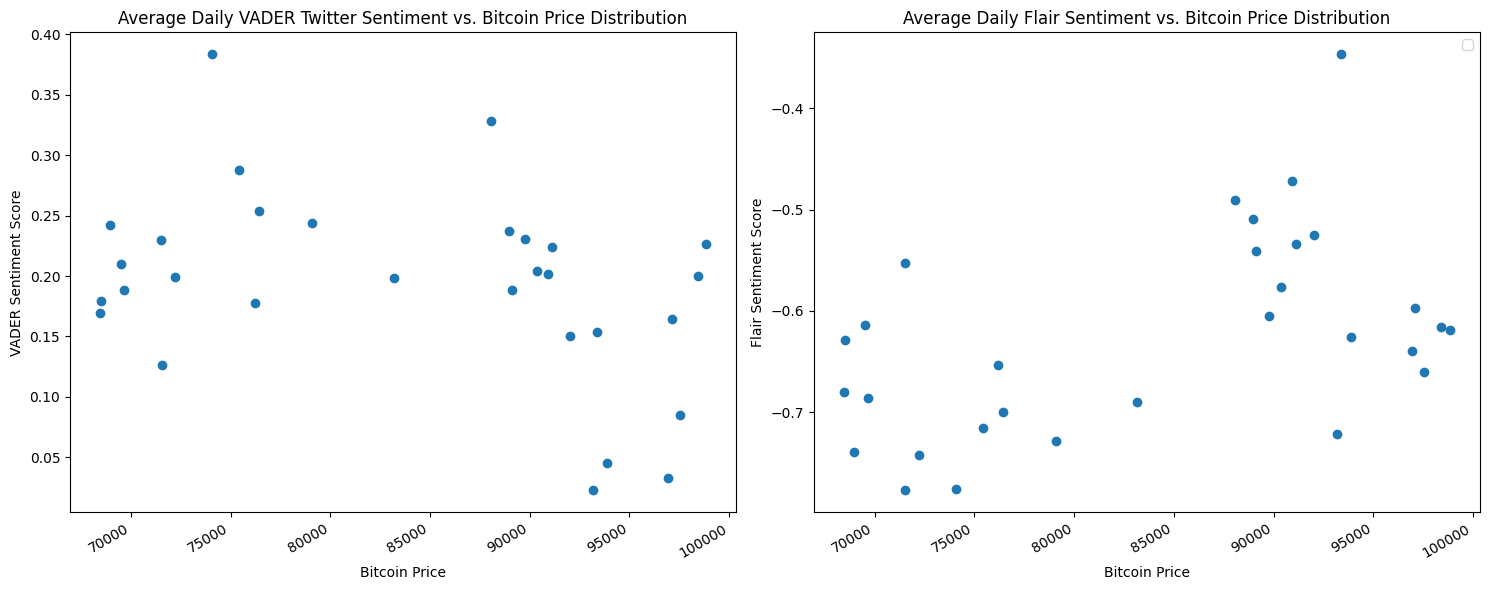

In [67]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['price'], day_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Average Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(day_btc_tw['price'], day_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Average Daily Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/4095220818.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


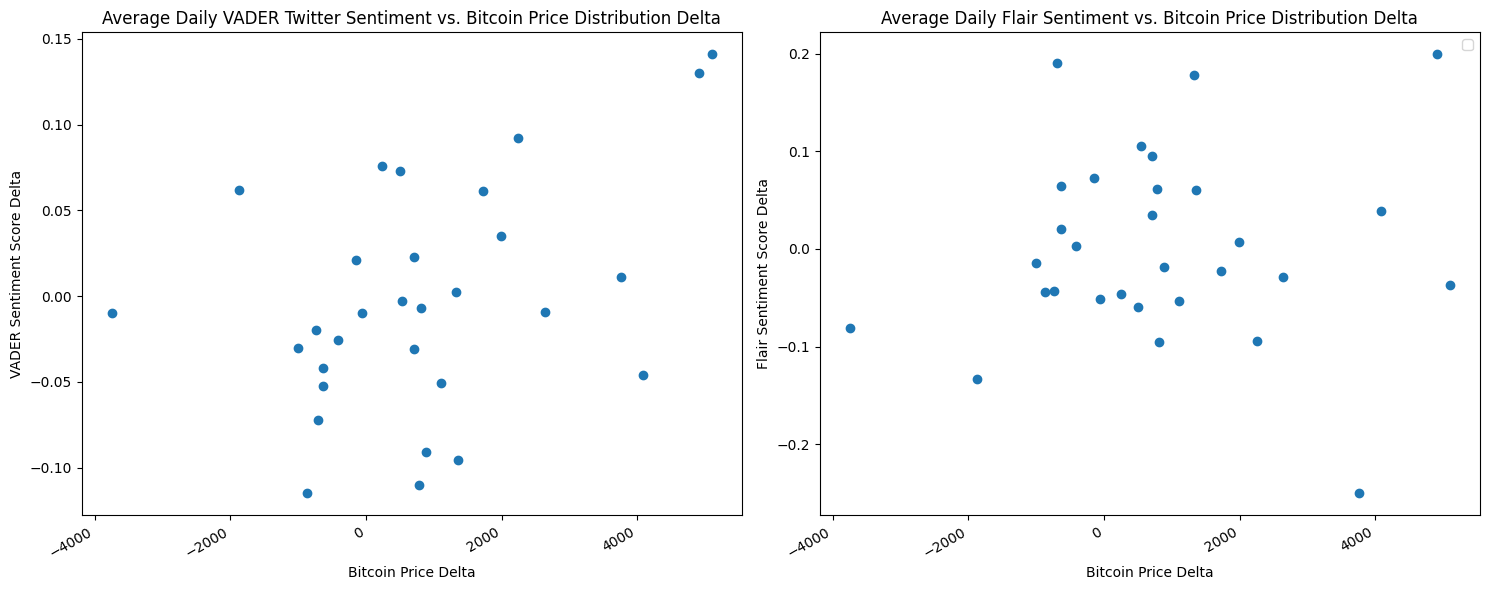

In [68]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['price_delta'], day_btc_tw['vd_compound_delta'])
ax[0].set_xlabel("Bitcoin Price Delta")
ax[0].set_ylabel("VADER Sentiment Score Delta")
ax[0].set_title("Average Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution Delta")

ax[1].scatter(day_btc_tw['price_delta'], day_btc_tw['fl_confidence_delta'] )
ax[1].set_xlabel("Bitcoin Price Delta")
ax[1].set_ylabel("Flair Sentiment Score Delta")
ax[1].set_title("Average Daily Flair Sentiment vs. Bitcoin Price Distribution Delta")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [69]:
# Merge btc_data with tw_data using sentiment median values
df = pd.merge(day_btc, v_day_med, on='time')
day_btc_tw = pd.merge(df, f_day_med, on='time')

day_btc_tw.head(5)

,time,price,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence
0,2024-10-28,69289.377500,0.0,0.0,0.889,0.0,-0.992180
1,2024-10-29,71537.300417,0.0,0.0,0.889,0.0,-0.994748
2,2024-10-30,72240.830417,0.0,0.0,1.000,0.0,-0.994748
3,2024-10-31,71540.485417,0.0,0.0,1.000,0.0,-0.965998
4,2024-11-01,69668.325833,0.0,0.0,1.000,0.0,-0.998059


In [71]:
day_btc_tw['price_delta'] = day_btc_tw['price'].diff()
day_btc_tw['fl_confidence_delta'] = day_btc_tw['fl_confidence'].diff()
day_btc_tw['vd_compound_delta'] = day_btc_tw['vd_compound'].diff()

day_btc_tw = day_btc_tw.dropna()
day_btc_tw.head(5)


,time,price,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence,price_delta,fl_confidence_delta,vd_compound_delta
1,2024-10-29,71537.300417,0.0,0.0,0.889,0.0,-0.994748,2247.922917,-0.002568,0.0
2,2024-10-30,72240.830417,0.0,0.0,1.000,0.0,-0.994748,703.530000,0.000000,0.0
3,2024-10-31,71540.485417,0.0,0.0,1.000,0.0,-0.965998,-700.345000,0.028750,0.0
4,2024-11-01,69668.325833,0.0,0.0,1.000,0.0,-0.998059,-1872.159583,-0.032061,0.0
5,2024-11-02,69523.744167,0.0,0.0,1.000,0.0,-0.995551,-144.581667,0.002508,0.0


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/808657427.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


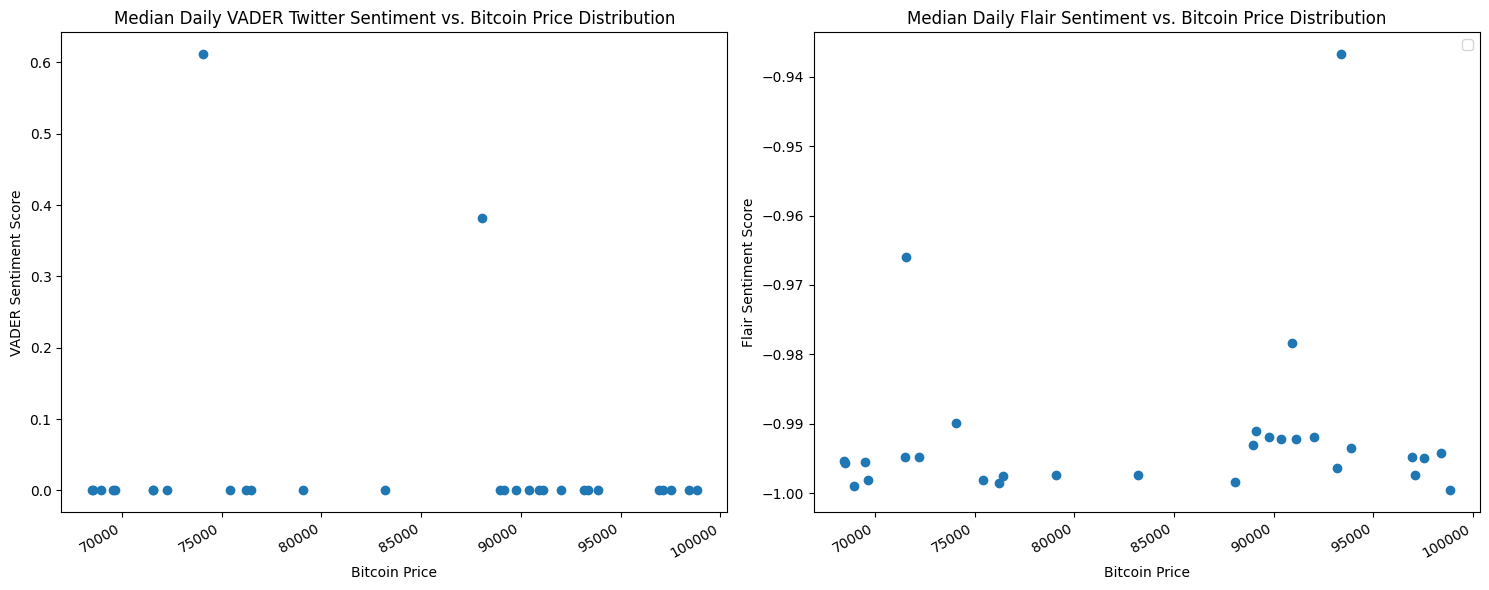

In [72]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['price'], day_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Median Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(day_btc_tw['price'], day_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Median Daily Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/3415617904.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


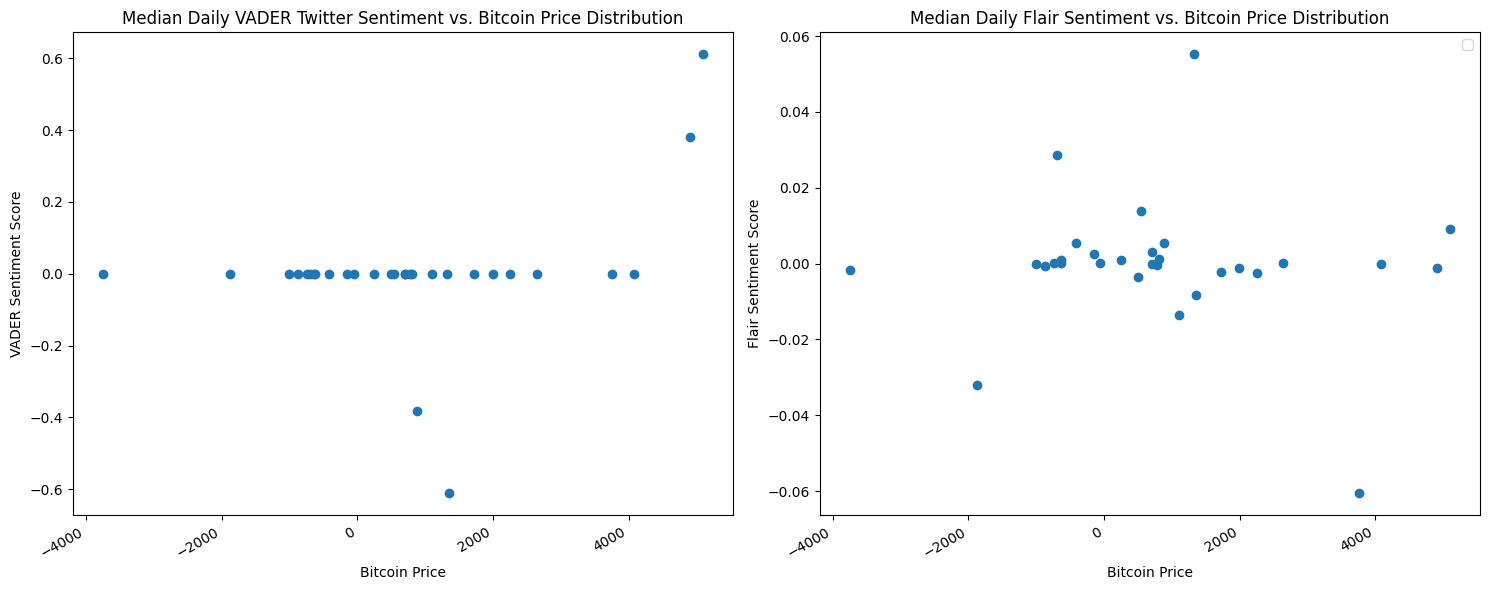

In [73]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['price_delta'], day_btc_tw['vd_compound_delta'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Median Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(day_btc_tw['price_delta'], day_btc_tw['fl_confidence_delta'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Median Daily Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

## Daily Max/Min Price Values VS. Daily Twitter Sentiment 

In [74]:
# Daily high 
btc_day_high = btc_data.groupby(
  btc_data['time'].dt.floor('d')
  )[['dayHigh']].max().reset_index()

btc_day_high.head(5)

,time,dayHigh
0,2024-10-28,70288.00
1,2024-10-29,73624.98
2,2024-10-30,73624.98
3,2024-10-31,73060.00
4,2024-11-01,72684.02


In [75]:
# Merge btc_data with tw_data using sentiment mean values
df = pd.merge(btc_day_high, v_day_mean, on='time')
day_btc_tw = pd.merge(df, f_day_mean, on='time')

day_btc_tw.head(5)

,time,dayHigh,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence
0,2024-10-28,70288.00,0.084480,0.032990,0.882500,0.137509,-0.683241
1,2024-10-29,73624.98,0.087436,0.020728,0.891824,0.229950,-0.777407
2,2024-10-30,73624.98,0.078708,0.015728,0.905576,0.199071,-0.742708
3,2024-10-31,73060.00,0.066368,0.030445,0.903187,0.126812,-0.552631
4,2024-11-01,72684.02,0.080500,0.029864,0.889636,0.188688,-0.686260


In [76]:
day_btc_tw['dayHigh_delta'] = day_btc_tw['dayHigh'].diff()
day_btc_tw['fl_confidence_delta'] = day_btc_tw['fl_confidence'].diff()
day_btc_tw['vd_compound_delta'] = day_btc_tw['vd_compound'].diff()

day_btc_tw = day_btc_tw.dropna()
day_btc_tw.head(5)

,time,dayHigh,vd_positive,vd_negative,vd_neutral,vd_compound,fl_confidence,dayHigh_delta,fl_confidence_delta,vd_compound_delta
1,2024-10-29,73624.98,0.087436,0.020728,0.891824,0.229950,-0.777407,3336.98,-0.094166,0.092441
2,2024-10-30,73624.98,0.078708,0.015728,0.905576,0.199071,-0.742708,0.00,0.034699,-0.030879
3,2024-10-31,73060.00,0.066368,0.030445,0.903187,0.126812,-0.552631,-564.98,0.190076,-0.072259
4,2024-11-01,72684.02,0.080500,0.029864,0.889636,0.188688,-0.686260,-375.98,-0.133629,0.061876
5,2024-11-02,71653.00,0.088366,0.022634,0.888980,0.209704,-0.614160,-1031.02,0.072100,0.021015


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_4869/15550169.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


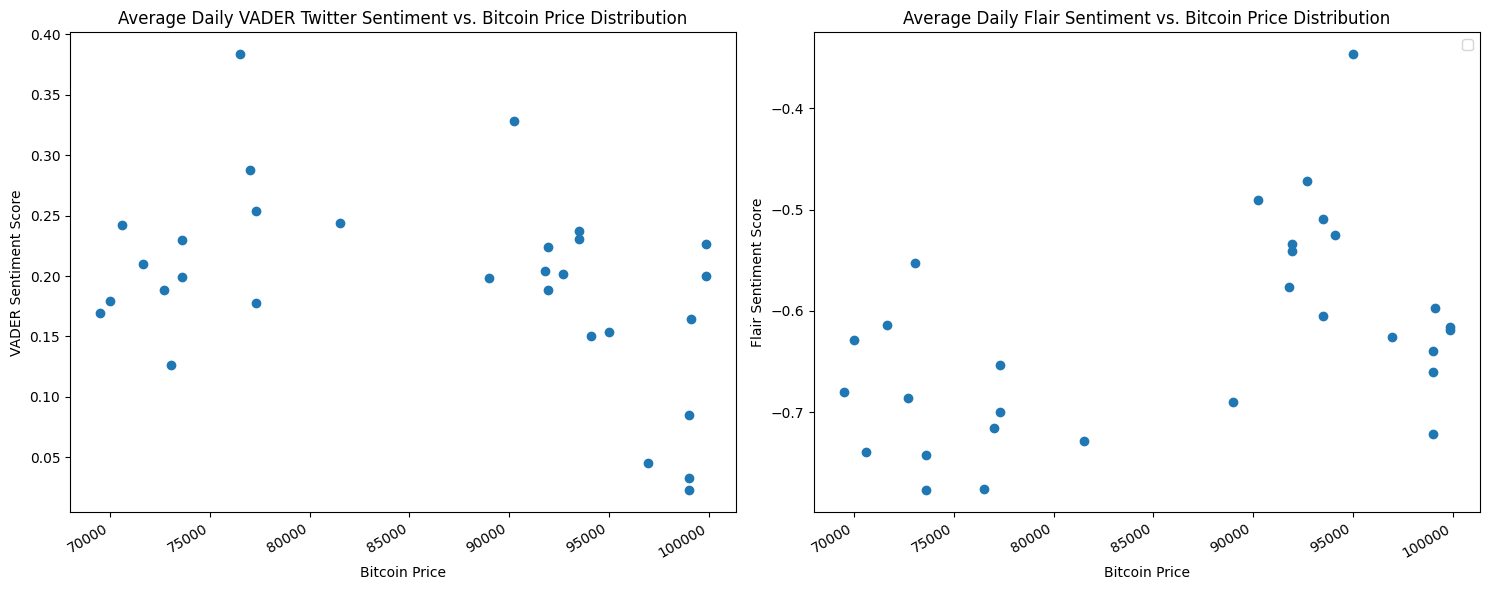

In [77]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['dayHigh'], day_btc_tw['vd_compound'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Average Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(day_btc_tw['dayHigh'], day_btc_tw['fl_confidence'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Average Daily Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Twitter sentiment vs. bitcoin price distribution 
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(day_btc_tw['dayHigh_delta'], day_btc_tw['vd_compound_delta'])
ax[0].set_xlabel("Bitcoin Price")
ax[0].set_ylabel("VADER Sentiment Score")
ax[0].set_title("Average Daily VADER Twitter Sentiment vs. Bitcoin Price Distribution")

ax[1].scatter(day_btc_tw['dayHigh_delta'], day_btc_tw['fl_confidence_delta'] )
ax[1].set_xlabel("Bitcoin Price")
ax[1].set_ylabel("Flair Sentiment Score")
ax[1].set_title("Average Daily Flair Sentiment vs. Bitcoin Price Distribution")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()